## Tennis Ace


*Project Goals*

You will create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the Association of Tennis Professionals (ATP) data, you will determine what it takes to be one of the best tennis players in the world.

#####  “Game, Set, Match!”

No three words are sweeter to hear as a tennis player than those, which indicate that a player has beaten their opponent. While you can head down to your nearest court and aim to overcome your challenger across the net without much practice, a league of professionals spends day and night, month after month practicing to be among the best in the world. 

Provided in tennis_stats.csv is data from the men’s professional tennis league, which is called the ATP (Association of Tennis Professionals). Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes. Load the csv into a DataFrame and investigate it to gain familiarity with the data.

In [1]:
# Loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Let's take a lood at data
df = pd.read_csv('tennis_stats.csv')
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

The ATP men’s tennis dataset includes a wide array of tennis statistics, which are described below:

#### Identifying Data

* **Player**: name of the tennis player
* **Year**: year data was recorded

#### Service Game Columns (Offensive)

* **Aces**: number of serves by the player where the receiver does not touch the ball
* **DoubleFaults**: number of times player missed both first and second serve attempts
* **FirstServe**: % of first-serve attempts made
* **FirstServePointsWon**: % of first-serve attempt points won by the player
* **SecondServePointsWon**: % of second-serve attempt points won by the player
* **BreakPointsFaced**: number of times where the receiver could have won service game of the player
* **BreakPointsSaved**: % of the time the player was able to stop the receiver from winning service game when they had the chance
* **ServiceGamesPlayed**: total number of games where the player served
* **ServiceGamesWon**: total number of games where the player served and won
* **TotalServicePointsWon**: % of points in games where the player served that they won

#### Return Game Columns (Defensive)

* **FirstServeReturnPointsWon**: % of opponents first-serve points the player was able to win
* **SecondServeReturnPointsWon**: % of opponents second-serve points the player was able to win
* **BreakPointsOpportunities**: number of times where the player could have won the service game of the opponent
* **BreakPointsConverted**: % of the time the player was able to win their opponent’s service game when they had the chance
* **ReturnGamesPlayed**: total number of games where the player’s opponent served
* **ReturnGamesWon**: total number of games where the player’s opponent served and the player won
* **ReturnPointsWon**: total number of points where the player’s opponent served and the player won
* **TotalPointsWon**: % of points won by the player

#### Outcomes

* **Wins**: number of matches won in a year
* **Losses**: number of matches lost in a year
* **Winnings**: total winnings in USD($) in a year
* **Ranking**: ranking at the end of year

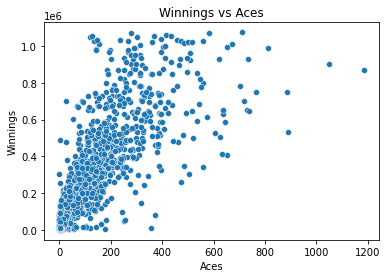

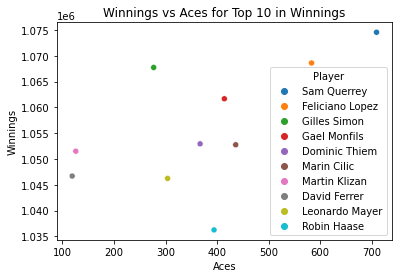

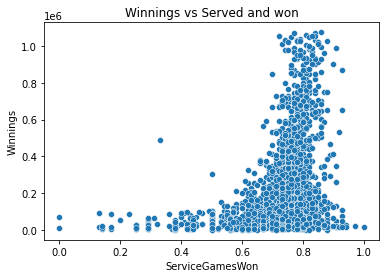

<Figure size 432x288 with 0 Axes>

In [4]:
# EDA Winnigs vs Aces
sns.scatterplot(data=df, x = 'Aces', y = 'Winnings')
plt.title('Winnings vs Aces')
plt.show()
plt.clf()

# Top 10 winners dataframe
top10_winners = df.sort_values(by=['Winnings'], ascending=False)[0:10]
top10_winners
# EDA Winnigs vs Aces
sns.scatterplot(data=top10_winners, y='Winnings', x = 'Aces', hue='Player')
plt.title('Winnings vs Aces for Top 10 in Winnings')
plt.show()
plt.clf()

# EDA Winnings vs ServiceGamesWon
sns.scatterplot(data=df, x = 'ServiceGamesWon', y = 'Winnings')
plt.title('Winnings vs Served and won')
plt.show()
plt.clf()




#### Scaling

To perform constructive analysis first we need to put out data on the same scale.

In [8]:
# Scale the data
#get only numerical columns from our existing dataframe
df_nums = df.drop(columns=['Player', 'Year', 'Wins', 'Losses', 'Ranking'])
columns = df_nums.columns

#instantiate standard scaler
scaler = StandardScaler()
#fit transform data
array_nums_scaled = scaler.fit_transform(df_nums)
#Creating scaled df
df_nums_scaled = pd.DataFrame(array_nums_scaled, columns=columns)
print(df_nums_scaled.head())

   FirstServe  FirstServePointsWon  FirstServeReturnPointsWon  \
0    5.171723            -2.567238                   2.089731   
1    4.438006            -0.862734                  -0.029554   
2    4.254577            -1.146818                   0.323660   
3    4.254577            -0.578650                   1.383303   
4    3.887719            -1.999070                  -4.621340   

   SecondServePointsWon  SecondServeReturnPointsWon      Aces  \
0              0.303029                   -1.116981 -0.704038   
1             -2.238745                   -5.793459 -0.653286   
2              0.751577                   -0.386282 -0.689538   
3              1.648674                   -1.993821 -0.689538   
4             -2.238745                   -1.993821 -0.696788   

   BreakPointsConverted  BreakPointsFaced  BreakPointsOpportunities  \
0             -1.407931         -0.880806                 -0.781563   
1             -2.267147         -0.880806                 -0.838600   
2    

#### One feature predictions

##### Helper function
We will use just one feature to build a single feature linear regression model on the data and predict "Winnings" outcome. 

Before training the model, we will split data into training and test datasets so that we can evaluate our model on the test set. And we will plot model’s predictions on the test set against the actual outcome variable to visualize the performance.

Everything will be done within helper function which will provide summury of test score for every single feature.

In [51]:
# Creation of help funtion to create linear regression model and plot its results
def winnings_ols(feature):
    # Split the data into train and test parts
    X = df_nums_scaled[[feature]]
    y = df_nums_scaled[['Winnings']]

    x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2)
    # Ordinary Least Squares method
    ols = LinearRegression()
    # fit model
    ols.fit(x_train,y_train)
    # predict Winnings on test data
    winnings_predict = ols.predict(x_test)
    # R2 score (Residual Analysis)
    print(str(feature) +  ' Train score:')
    print(ols.score(x_train,y_train))
    print(str(feature) + ' Test score:')
    print(ols.score(x_test,y_test))
    # Feature coef
    print(str(feature) +  ' coefficient:')
    print(ols.coef_)

    # Plot Residuals Vs Winnings prediction
    residuals = winnings_predict - y_test
    plt.scatter(winnings_predict, residuals, alpha=0.4)
    plt.xlabel('Predicted winnings')
    plt.ylabel('Residuals')
    plt.title(str(feature) + ' Residuals Analysis')
    plt.show()
    plt.clf()

    # Plot actual winnings (Test data) vs prected winnings from the model for the test data 
    plt.scatter(y_test, winnings_predict,alpha=0.4)
    plt.plot(range(-1,4),range(-1,4))
    plt.xlabel('Actual winnings')
    plt.ylabel('Predicted winnings')
    plt.title('Actual Winnings vs Predicted winnings by ' + str(feature))
    plt.show()
    plt.clf()
    
    return feature, ols.score(x_test,y_test)

FirstServe Train score:
0.003893354523701098
FirstServe Test score:
-0.02516544656543962
FirstServe coefficient:
[[0.06485131]]


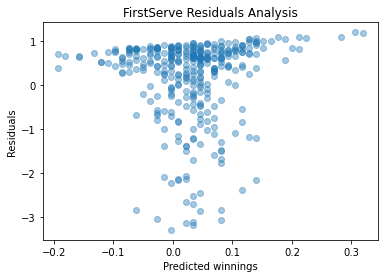

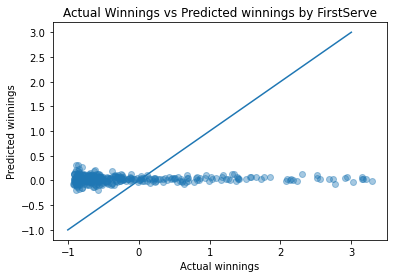

FirstServePointsWon Train score:
0.13258886812850923
FirstServePointsWon Test score:
0.1197087590982373
FirstServePointsWon coefficient:
[[0.37195053]]


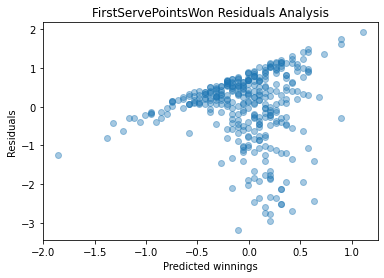

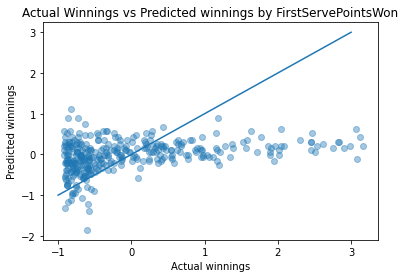

FirstServeReturnPointsWon Train score:
0.06423708016900431
FirstServeReturnPointsWon Test score:
0.027901253163843287
FirstServeReturnPointsWon coefficient:
[[0.25761492]]


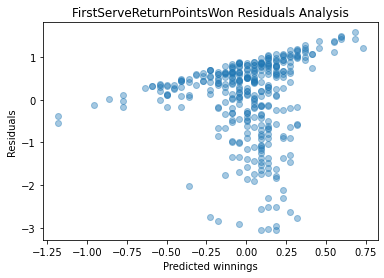

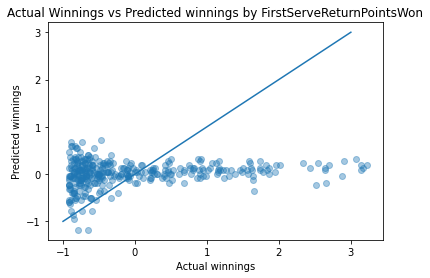

SecondServePointsWon Train score:
0.08783183111611659
SecondServePointsWon Test score:
0.04272317614947063
SecondServePointsWon coefficient:
[[0.29667112]]


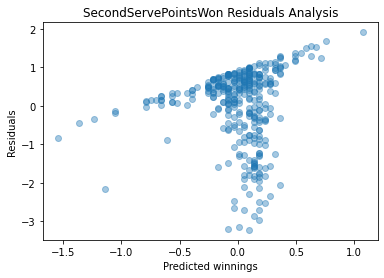

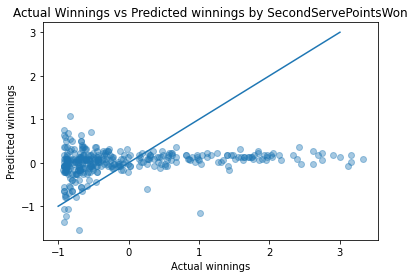

SecondServeReturnPointsWon Train score:
0.03711033859545576
SecondServeReturnPointsWon Test score:
0.05052953159365958
SecondServeReturnPointsWon coefficient:
[[0.19112842]]


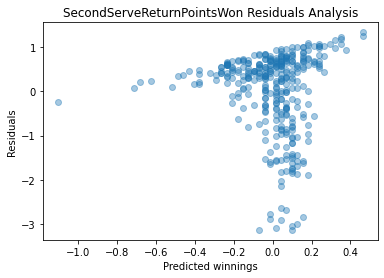

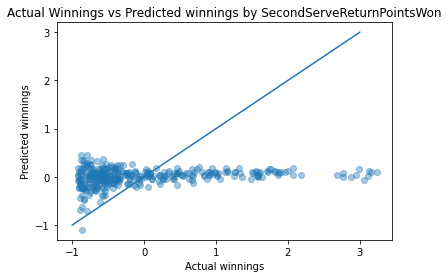

Aces Train score:
0.6442739735549138
Aces Test score:
0.6035102492427667
Aces coefficient:
[[0.81071838]]


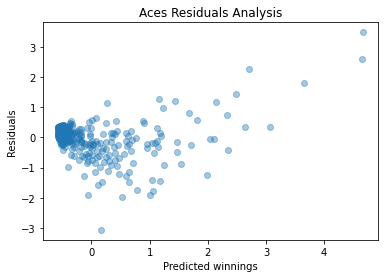

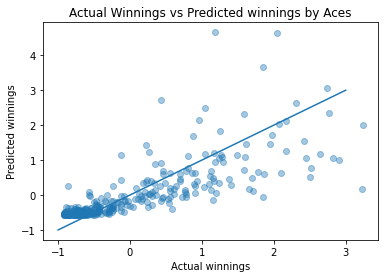

BreakPointsConverted Train score:
0.004183793558601878
BreakPointsConverted Test score:
0.01042739897434164
BreakPointsConverted coefficient:
[[0.0650099]]


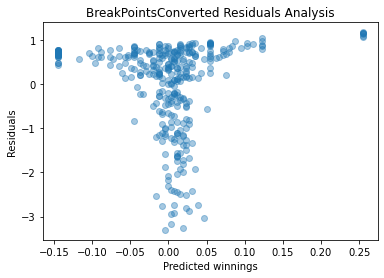

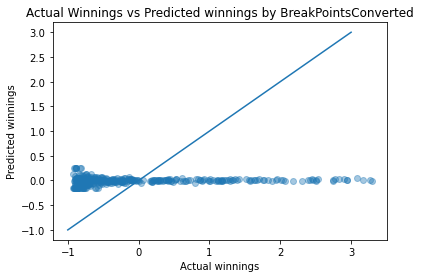

BreakPointsFaced Train score:
0.752100236484701
BreakPointsFaced Test score:
0.8064749975491412
BreakPointsFaced coefficient:
[[0.85624217]]


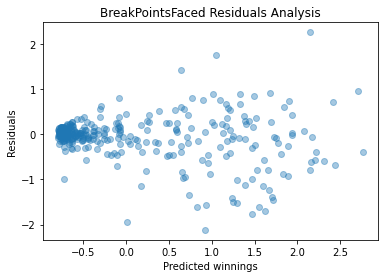

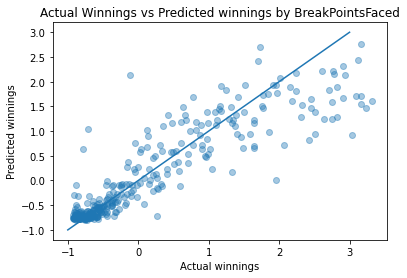

BreakPointsOpportunities Train score:
0.8171577561967235
BreakPointsOpportunities Test score:
0.7891783055871074
BreakPointsOpportunities coefficient:
[[0.8989991]]


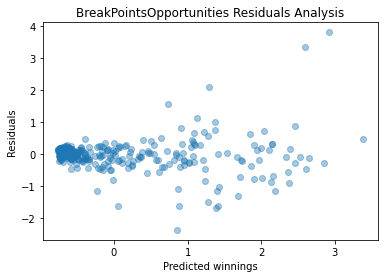

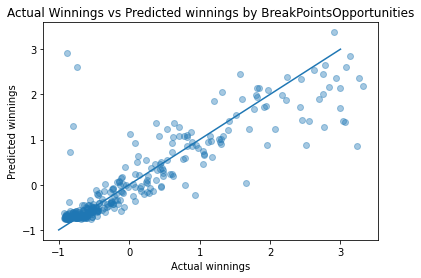

BreakPointsSaved Train score:
0.0611476064534523
BreakPointsSaved Test score:
0.08860047193399034
BreakPointsSaved coefficient:
[[0.25055755]]


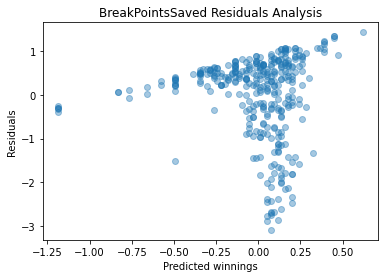

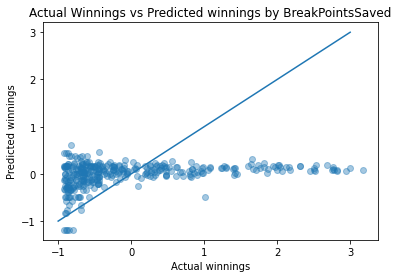

DoubleFaults Train score:
0.719769657151059
DoubleFaults Test score:
0.7775741144771917
DoubleFaults coefficient:
[[0.85423553]]


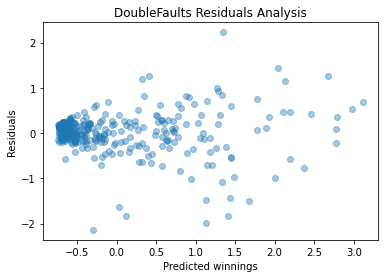

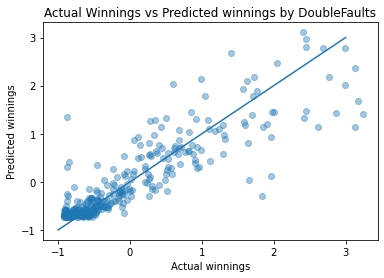

ReturnGamesPlayed Train score:
0.826053446646612
ReturnGamesPlayed Test score:
0.8626448673712243
ReturnGamesPlayed coefficient:
[[0.91848854]]


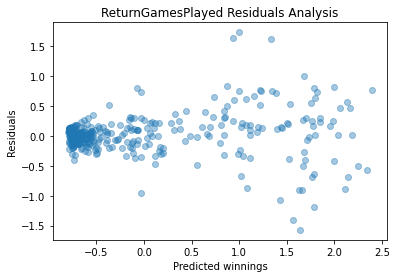

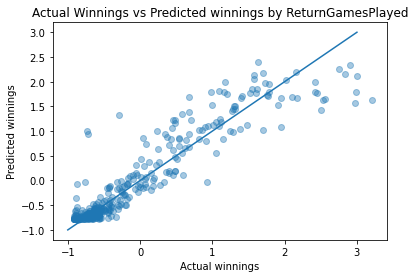

ReturnGamesWon Train score:
0.08149731663383031
ReturnGamesWon Test score:
0.03284946333773575
ReturnGamesWon coefficient:
[[0.2925723]]


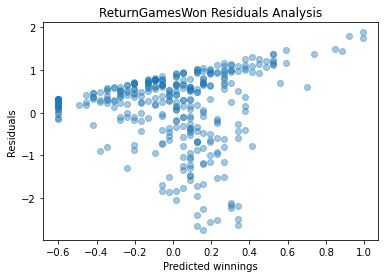

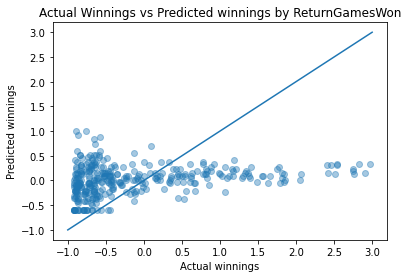

ReturnPointsWon Train score:
0.07045766480518367
ReturnPointsWon Test score:
0.08434752378671617
ReturnPointsWon coefficient:
[[0.27819558]]


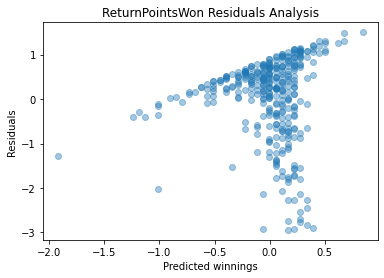

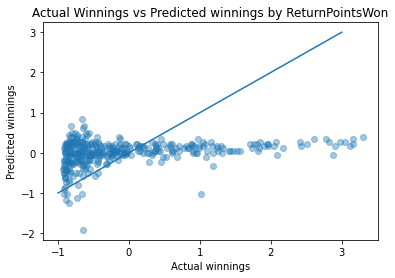

ServiceGamesPlayed Train score:
0.8353564405601349
ServiceGamesPlayed Test score:
0.8245979765014422
ServiceGamesPlayed coefficient:
[[0.91337869]]


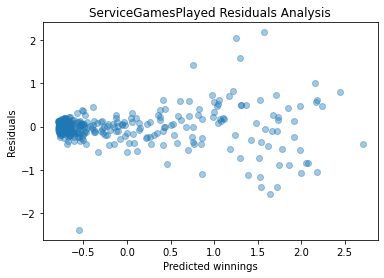

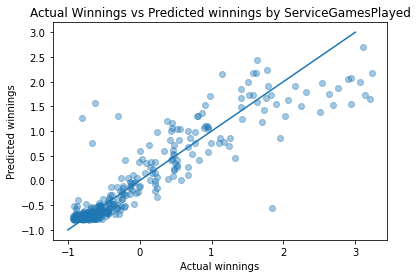

ServiceGamesWon Train score:
0.15967655395722757
ServiceGamesWon Test score:
0.14311512924129455
ServiceGamesWon coefficient:
[[0.38999553]]


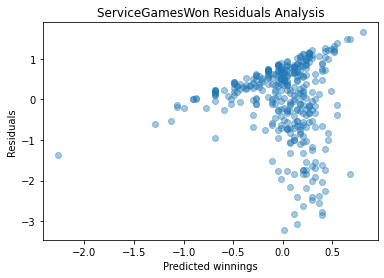

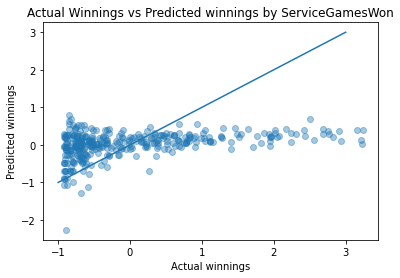

TotalPointsWon Train score:
0.22567691501517295
TotalPointsWon Test score:
0.16372163654306782
TotalPointsWon coefficient:
[[0.46831143]]


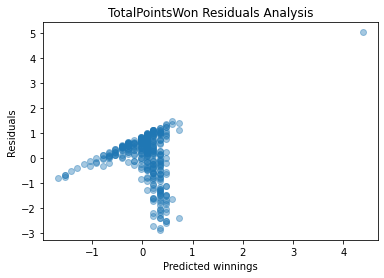

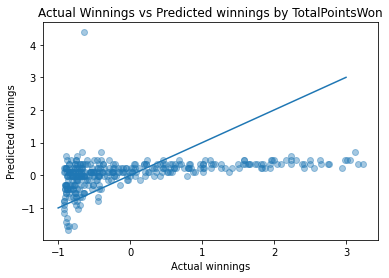

TotalServicePointsWon Train score:
0.16420372171594544
TotalServicePointsWon Test score:
0.17110207410544986
TotalServicePointsWon coefficient:
[[0.39736689]]


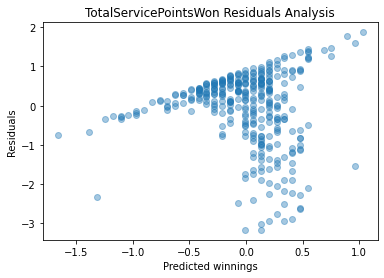

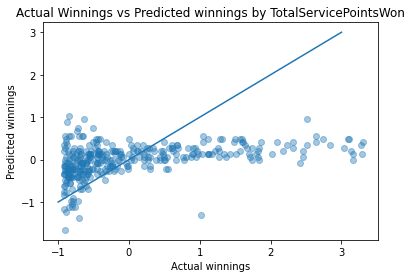

Winnings Train score:
1.0
Winnings Test score:
1.0
Winnings coefficient:
[[1.]]


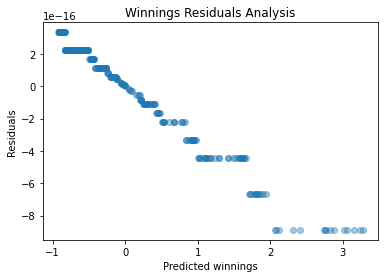

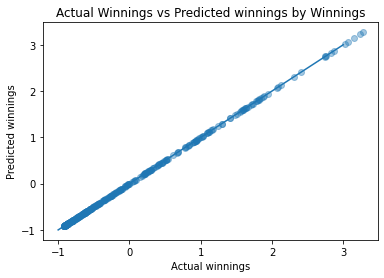

[('FirstServe', -0.02516544656543962),
 ('FirstServePointsWon', 0.1197087590982373),
 ('FirstServeReturnPointsWon', 0.027901253163843287),
 ('SecondServePointsWon', 0.04272317614947063),
 ('SecondServeReturnPointsWon', 0.05052953159365958),
 ('Aces', 0.6035102492427667),
 ('BreakPointsConverted', 0.01042739897434164),
 ('BreakPointsFaced', 0.8064749975491412),
 ('BreakPointsOpportunities', 0.7891783055871074),
 ('BreakPointsSaved', 0.08860047193399034),
 ('DoubleFaults', 0.7775741144771917),
 ('ReturnGamesPlayed', 0.8626448673712243),
 ('ReturnGamesWon', 0.03284946333773575),
 ('ReturnPointsWon', 0.08434752378671617),
 ('ServiceGamesPlayed', 0.8245979765014422),
 ('ServiceGamesWon', 0.14311512924129455),
 ('TotalPointsWon', 0.16372163654306782),
 ('TotalServicePointsWon', 0.17110207410544986),
 ('Winnings', 1.0)]

<Figure size 432x288 with 0 Axes>

In [52]:
# apply help function for every feature in the dataframe
dic=[]
for i in df_nums_scaled.columns:
    dic.append(winnings_ols(i))
dic

With the help of the function we can see that 6 features stand out with higher score than the rest. Those are :
* **Aces**: number of serves by the player where the receiver does not touch the ball
* **BreakPointsFaced**: number of times where the receiver could have won service game of the player
* **BreakPointsOpportunities**: number of times where the player could have won the service game of the opponent
* **DoubleFaults**: number of times player missed both first and second serve attempts
* **ReturnGamesPlayed**: total number of games where the player’s opponent served
* **ServiceGamesPlayed**: total number of games where the player served


#### Two Features predictions

Now let's try to use two features to predict yearly winnings.

##### "Aces" and "TotalPointsWon" predictions

Aces/TotalPointsWon Train score:
0.6532836644297941
Aces/TotalPointsWon Test score:
0.6567060829728146
Aces/TotalPointsWon coefficient:
[[0.73719451 0.13750128]]


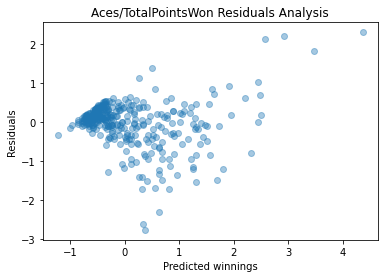

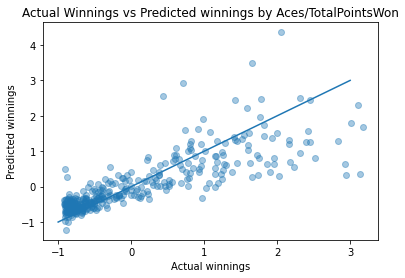

<Figure size 432x288 with 0 Axes>

In [13]:
# Aces and TotalPointsWon

# Split the data into train and test parts
X = df_nums_scaled[['Aces', 'TotalPointsWon']]
y = df_nums_scaled[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2)
# Ordinary Least Squares method
ols_atpw = LinearRegression()
# fit model
ols_atpw.fit(x_train,y_train)
# predict Winnings on test data
winnings_predict_atpw = ols_atpw.predict(x_test)
# R2 score (Residual Analysis)
print('Aces/TotalPointsWon Train score:')
print(ols_atpw.score(x_train,y_train))
print('Aces/TotalPointsWon Test score:')
print(ols_atpw.score(x_test,y_test))
# Aces and TotalPointsWon coef
print("Aces/TotalPointsWon coefficient:")
print(ols_atpw.coef_)

# Plot Residuals Vs Winnings prediction
residuals_atpw = winnings_predict_atpw - y_test
plt.scatter(winnings_predict_atpw, residuals_atpw, alpha=0.4)
plt.xlabel('Predicted winnings')
plt.ylabel('Residuals')
plt.title('Aces/TotalPointsWon Residuals Analysis')
plt.show()
plt.clf()

# Plot actual winnings (Test data) vs prected winnings from the model for the test data 
plt.scatter(y_test, winnings_predict_atpw,alpha=0.4)
plt.plot(range(-1,4),range(-1,4))
plt.xlabel('Actual winnings')
plt.ylabel('Predicted winnings')
plt.title('Actual Winnings vs Predicted winnings by Aces/TotalPointsWon')
plt.show()
plt.clf()

##### "Aces" and "ServiceGameWon"

Aces/ServiceGameWon Train score:
0.638805723549412
Aces/ServiceGameWon Test score:
0.6436204616724371
Aces/ServiceGameWon coefficient:
[[0.76886557 0.05493612]]


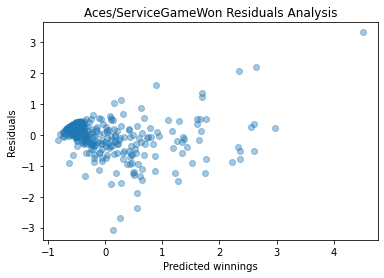

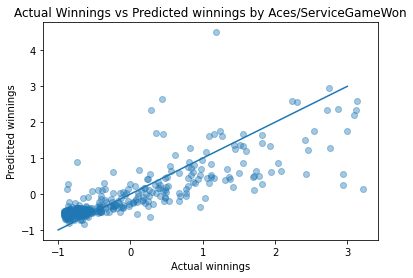

<Figure size 432x288 with 0 Axes>

In [14]:
# Aces and ServiceGameWon

# Split the data into train and test parts
X = df_nums_scaled[['Aces','ServiceGamesWon']]
y = df_nums_scaled[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2)
# Ordinary Least Squares method
ols_asgw = LinearRegression()
# fit model
ols_asgw.fit(x_train,y_train)
# predict Winnings on test data
winnings_predict_asgw = ols_asgw.predict(x_test)
# R2 score (Residual Analysis)
print('Aces/ServiceGameWon Train score:')
print(ols_asgw.score(x_train,y_train))
print('Aces/ServiceGameWon Test score:')
print(ols_asgw.score(x_test,y_test))
# Aces and ServiceGameWon coef
print("Aces/ServiceGameWon coefficient:")
print(ols_asgw.coef_)

# Plot Residuals Vs Winnings prediction
residuals_asgw = winnings_predict_asgw - y_test
plt.scatter(winnings_predict_asgw, residuals_asgw, alpha=0.4)
plt.xlabel('Predicted winnings')
plt.ylabel('Residuals')
plt.title('Aces/ServiceGameWon Residuals Analysis')
plt.show()
plt.clf()

# Plot actual winnings (Test data) vs prected winnings from the model for the test data 
plt.scatter(y_test, winnings_predict_asgw,alpha=0.4)
plt.plot(range(-1,4),range(-1,4))
plt.xlabel('Actual winnings')
plt.ylabel('Predicted winnings')
plt.title('Actual Winnings vs Predicted winnings by Aces/ServiceGameWon')
plt.show()
plt.clf()

#### Multiple features

And now let's use multiple predictors for the yearly winnings

All features Train score:
0.8504653034025909
All features Test score:
0.8016193151227229
All features coefficients:
[[ 5.30506482e-03  3.44118247e-02  8.12685636e-06  1.51697228e-02
   4.28088295e-03 -6.08601804e-02 -2.20511264e-03 -4.35390219e-01
   4.24926250e-01  3.08063702e-02  7.09937226e-02  1.43452613e-01
   3.58098989e-02 -8.26639725e-03  7.62813464e-01 -2.80561758e-02
  -5.81556664e-02  2.44188927e-02]]


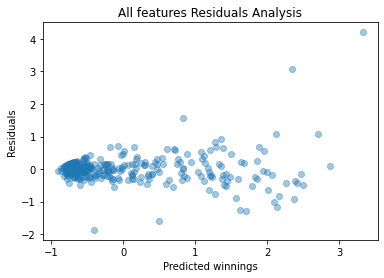

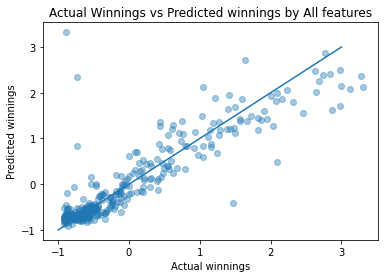

<Figure size 432x288 with 0 Axes>

In [76]:
# All features excluding Name, Year, Wins, Losses, Rankings

# Split the data into train and test parts
X = df_nums_scaled[['FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon']]
y = df_nums_scaled[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2)
# Ordinary Least Squares method
ols_all = LinearRegression()
# fit model
ols_all.fit(x_train,y_train)
# predict Winnings on test data
winnings_predict_all = ols_all.predict(x_test)
# R2 score (Residual Analysis)
print('All features Train score:')
print(ols_all.score(x_train,y_train))
print('All features Test score:')
print(ols_all.score(x_test,y_test))
# All features coef
print("All features coefficients:")
print(ols_all.coef_)

# Plot Residuals Vs Winnings prediction
residuals_all = winnings_predict_all - y_test
plt.scatter(winnings_predict_all, residuals_all, alpha=0.4)
plt.xlabel('Predicted winnings')
plt.ylabel('Residuals')
plt.title('All features Residuals Analysis')
plt.show()
plt.clf()

# Plot actual winnings (Test data) vs prected winnings from the model for the test data 
plt.scatter(y_test, winnings_predict_all,alpha=0.4)
plt.plot(range(-1,4),range(-1,4))
plt.xlabel('Actual winnings')
plt.ylabel('Predicted winnings')
plt.title('Actual Winnings vs Predicted winnings by All features')
plt.show()
plt.clf()

Seems like 'BreakPointsConverted' doesn't do much let's remove it from the list.

BreakPointsConverted out, Train score:
0.8305753379335675
BreakPointsConverted out, Test score:
0.8881050630705329
BreakPointsConverted out, coefficients:
[[ 0.00102675  0.00327252 -0.00672401  0.00611064  0.00867182 -0.03002615
  -0.43297895  0.35782404  0.02695521  0.14786591  0.63097594  0.02767549
  -0.01215115  0.2252127  -0.00299351 -0.01368956  0.00431196]]


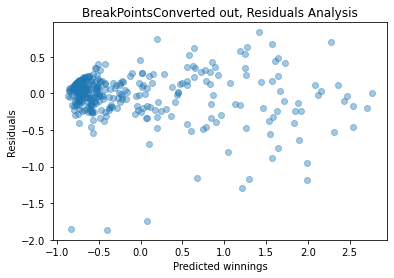

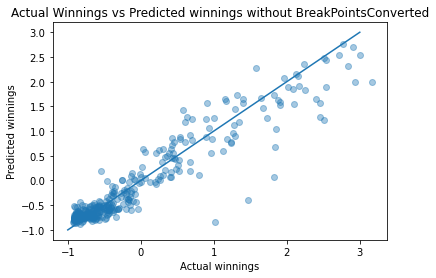

<Figure size 432x288 with 0 Axes>

In [87]:
# All features but 'BreakPointsConverted'

# Split the data into train and test parts
X = df_nums_scaled[['FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon']]
y = df_nums_scaled[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2)
# Ordinary Least Squares method
ols_all1 = LinearRegression()
# fit model
ols_all1.fit(x_train,y_train)
# predict Winnings on test data
winnings_predict_all1 = ols_all1.predict(x_test)
# R2 score (Residual Analysis)
print('BreakPointsConverted out, Train score:')
print(ols_all1.score(x_train,y_train))
print('BreakPointsConverted out, Test score:')
print(ols_all1.score(x_test,y_test))
# All features coef
print('BreakPointsConverted out, coefficients:')
print(ols_all1.coef_)

# Plot Residuals Vs Winnings prediction
residuals_all1 = winnings_predict_all1 - y_test
plt.scatter(winnings_predict_all1, residuals_all1, alpha=0.4)
plt.xlabel('Predicted winnings')
plt.ylabel('Residuals')
plt.title('BreakPointsConverted out, Residuals Analysis')
plt.show()
plt.clf()

# Plot actual winnings (Test data) vs prected winnings from the model for the test data 
plt.scatter(y_test, winnings_predict_all1,alpha=0.4)
plt.plot(range(-1,4),range(-1,4))
plt.xlabel('Actual winnings')
plt.ylabel('Predicted winnings')
plt.title('Actual Winnings vs Predicted winnings without BreakPointsConverted')
plt.show()
plt.clf()

#### Conclusion
* The highest test score was recorded at: 0.8881050630705329
* It was achieved with model with all features but 'BreakPointsConverted'
* Feature with highest significance appears to be 'ReturnGamesPlayed'
